# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [40]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
# OpenWeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [42]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Mackay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=mackay
Processing Record 2 | Kumul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=hami
Processing Record 3 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=port%20alfred
Processing Record 4 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=east%20london
Processing Record 5 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=rikitea
Processing Record 6 | New Norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=new%20norfolk
Processing Record 7 | Caravelas
http://api.openweathermap.org/data/2.5/wea

Processing Record 57 | Manitouwadge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=manitouwadge
Processing Record 58 | Lucapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=lucapa
Processing Record 59 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=esperance
Processing Record 60 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=busselton
Processing Record 61 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=kapaa
Processing Record 62 | Paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=paamiut
Processing Record 63 | Kedrovyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=k

Processing Record 113 | Uchaly
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=uchaly
Processing Record 114 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=cherskiy
Processing Record 115 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=chokurdakh
Processing Record 116 | Tikhvin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=tikhvin
Processing Record 117 | Bima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=bima
Processing Record 118 | Teguise
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=teguise
Processing Record 119 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=lompoc
P

Processing Record 169 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=port%20hardy
Processing Record 170 | Nekhayevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=nekhayevskiy
Processing Record 171 | Vaitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=vaitape
Processing Record 172 | Pemberton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=pemberton
Processing Record 173 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=longyearbyen
Processing Record 174 | Vyazemskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=vyazemskiy
Processing Record 175 | Da’an
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead

Processing Record 224 | Magistral'nyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=magistralnyy
Processing Record 225 | Kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=kieta
Processing Record 226 | Bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=bilma
Processing Record 227 | Buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=buala
City not found. Skipping...
Processing Record 228 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=nikolskoye
City not found. Skipping...
Processing Record 229 | Grand Gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=grand%20gaube
Processing Record 230 | Ambad
http://api.openweathermap.org/data/2.5/we

Processing Record 279 | Johannesburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=johannesburg
Processing Record 280 | Bucerías
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=bucerias
Processing Record 281 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=grindavik
Processing Record 282 | Zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=zhangye
Processing Record 283 | Khovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=hovd
Processing Record 284 | Sur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=sur
Processing Record 285 | Lagunillas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=l

Processing Record 335 | Dondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=dondo
Processing Record 336 | Hvide Sande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=hvide%20sande
Processing Record 337 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=qaqortoq
Processing Record 338 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=yulara
Processing Record 339 | Shillong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=shillong
Processing Record 340 | Osakarovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=osakarovka
Processing Record 341 | Yurty
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5

Processing Record 392 | Nkhotakota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=nkhotakota
Processing Record 393 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=tuatapere
Processing Record 394 | Arrondissement de Tarbes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=tarbes
Processing Record 395 | Bayir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=bayir
Processing Record 396 | Salé
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=sale
Processing Record 397 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=bilibino
Processing Record 398 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1db

Processing Record 448 | Rafaela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=rafaela
Processing Record 449 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=saint%20anthony
Processing Record 450 | Genhe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=genhe
Processing Record 451 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=camacha
City not found. Skipping...
Processing Record 452 | Lima
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=lima
Processing Record 453 | Tadine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=tadine
Processing Record 454 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0

Processing Record 504 | Eydhafushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=eydhafushi
Processing Record 505 | Vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=vanimo
Processing Record 506 | Canutama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=canutama
Processing Record 507 | Severnyy-Kospashskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=severnyy-kospashskiy
City not found. Skipping...
Processing Record 508 | Mendoza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=mendoza
Processing Record 509 | Makokou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9aead0167a0399e1dbe7366dab0b5f8&q=makokou
Processing Record 510 | Tessalit
http://api.openweathermap.org/data/2.5/weather?un

In [43]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [45]:
# Collect and parse the data into a Data Frame called 

city= []
clouds= []
country= []
date= []
humidity= []
lat= []
lng= []
temp= []
wind= []
for data in city_data:
    if data['cod']==200:
        city.append(data['name'])
        clouds.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])
        wind.append(data['wind']['speed'])

weather_dict = {"City": city,
                "Cloudiness": clouds,
                "Country": country,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lng,
                "Temperature (°F)": temp,
                "Wind Speed": wind}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df=weather_data_df[["City","Country","Lat","Lng","Temperature (°F)","Humidity","Wind Speed","Cloudiness"]]



weather_data_df.head()

,City,Country,Lat,Lng,Temperature (°F),Humidity,Wind Speed,Cloudiness
0,Avarua,CK,-21.2078,-159.7750,75.25,64,5.75,20
1,Zhigansk,RU,66.7697,123.3711,51.60,60,1.97,91
2,Narsaq,GL,60.9167,-46.0500,46.62,78,7.96,100
3,Albany,AU,-35.0169,117.8917,54.03,100,12.10,75
4,Port Hawkesbury,CA,45.6169,-61.3485,64.69,94,1.99,90


In [25]:
# Collect and parse the data into a Data Frame called 

city= []
clouds= []
country= []
date= []
humidity= []
lat= []
lng= []
temp= []
wind= []
for data in city_data:
    if data['cod']==200:
        city.append(data['name'])
        clouds.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])
        wind.append(data['wind']['speed'])

weather_dict = {"City": city,
                "Cloudiness": clouds,
                "Country": country,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lng,
                "Temperature (°F)": temp,
                "Wind Speed": wind}
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df=weather_data_df[["City","Country","Lat","Lng","Temperature (°F)","Humidity","Wind Speed","Cloudiness"]]



weather_data_df.head()

,City,Country,Lat,Lng,Temperature (°F),Humidity,Wind Speed,Cloudiness
0,Avarua,CK,-21.2078,-159.7750,75.25,64,5.75,20
1,Zhigansk,RU,66.7697,123.3711,51.60,60,1.97,91
2,Narsaq,GL,60.9167,-46.0500,46.62,78,7.96,100
3,Albany,AU,-35.0169,117.8917,54.03,100,12.10,75
4,Port Hawkesbury,CA,45.6169,-61.3485,64.69,94,1.99,90


In [46]:
 #Save weather data to a cities csv file
weather_data.to_csv("../output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

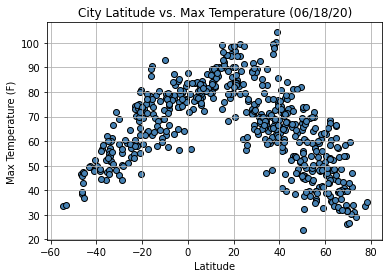

In [47]:
#Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

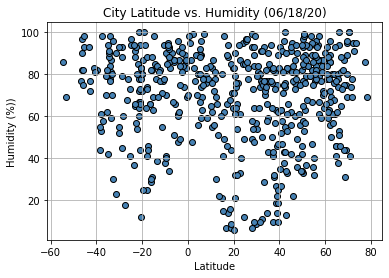

In [48]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

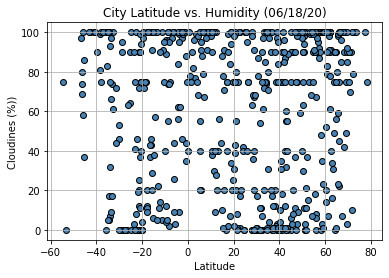

In [50]:
 #Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudines (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

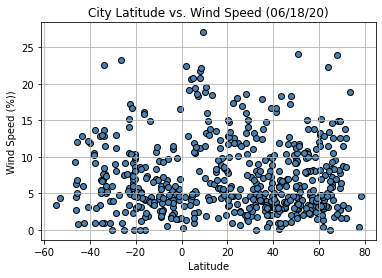

In [51]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (06/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")